### Import Depencencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression 

In [2]:
import seaborn as sns
import plotly
%matplotlib inline
import chart_studio.plotly as py
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
import eli5 

C:\Users\juanp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\juanp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


## Laod the data

In [5]:
df = pd.read_csv('finalBenefi9.csv')
df.head()

,Cat1,AvgS1,M1,Co1,Cat2,AvgS2,M2,Co2,Cat3,AvgS3,M3,Co3,Cat4,AvgS4,M4,Co4,NumDeg,NumCertf,NumJobs,AverageMonths
0,IT,71779.00000,23,1,Engineering,81584.97869,13,0,Engineering,81584.97869,14,0,IT,69783.63690,4,1,3,3,4,13.50
1,Unemployed,0.00000,21,1,Other,53085.31717,5,1,Other,53085.31717,33,0,Service,47500.00000,6,1,3,3,4,16.25
2,IT,69783.63690,11,1,IT,69783.63690,2,1,Unemployed,0.00000,21,1,Other,53085.31717,6,1,3,3,4,10.00
3,Engineering,81584.97869,7,1,IT,69783.63690,29,1,Operations,69434.83383,37,1,Management,79819.50204,102,1,3,3,4,43.75
4,Service,37263.83653,190,1,Other,53085.31717,18,0,Other,53085.31717,4,0,Other,53085.31717,5,0,3,3,4,54.25


## Data visualization

In [6]:
len(df)

3513

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513 entries, 0 to 3512
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cat1           3513 non-null   object 
 1   AvgS1          3513 non-null   float64
 2   M1             3513 non-null   int64  
 3   Co1            3513 non-null   int64  
 4   Cat2           3513 non-null   object 
 5   AvgS2          3513 non-null   float64
 6   M2             3513 non-null   int64  
 7   Co2            3513 non-null   int64  
 8   Cat3           3513 non-null   object 
 9   AvgS3          3513 non-null   float64
 10  M3             3513 non-null   int64  
 11  Co3            3513 non-null   int64  
 12  Cat4           3513 non-null   object 
 13  AvgS4          3513 non-null   float64
 14  M4             3513 non-null   int64  
 15  Co4            3513 non-null   int64  
 16  NumDeg         3513 non-null   int64  
 17  NumCertf       3513 non-null   int64  
 18  NumJobs 

In [8]:
df['Cat1'].describe(include=np.object)

count           3513
unique            22
top       Management
freq             797
Name: Cat1, dtype: object

In [9]:
df['AvgS1'].describe(include=np.object)

count      3513.000000
mean      73030.117488
std       31189.430311
min           0.000000
25%       51794.608330
50%       69783.636900
75%       79819.502040
max      541524.500000
Name: AvgS1, dtype: float64

In [10]:
df['M1'].describe(include=np.object)

count    3513.000000
mean       35.630515
std        47.387537
min         0.000000
25%         8.000000
50%        19.000000
75%        42.000000
max       515.000000
Name: M1, dtype: float64

In [11]:
df['AverageMonths'].describe(include=np.object)

count    3513.000000
mean       30.739325
std        25.166030
min         0.500000
25%        13.500000
50%        23.500000
75%        40.250000
max       184.750000
Name: AverageMonths, dtype: float64

In [13]:
df['NumJobs'].describe(include=np.object)

count    3513.000000
mean        3.675206
std         0.698683
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: NumJobs, dtype: float64

## Convert Coountries columns from numerical to categorical

In [14]:
df["Co1"] = df["Co1"].astype('category')

In [15]:
df['Co1'].describe(include=np.object)

count     3513
unique       2
top          1
freq      2554
Name: Co1, dtype: int64

In [17]:
df["Co2"] = df["Co2"].astype('category')
df["Co3"] = df["Co3"].astype('category')
df["Co4"] = df["Co4"].astype('category')

In [18]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(12,2,i)
        plt.plot(df[col],df["AverageMonths"],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()



20


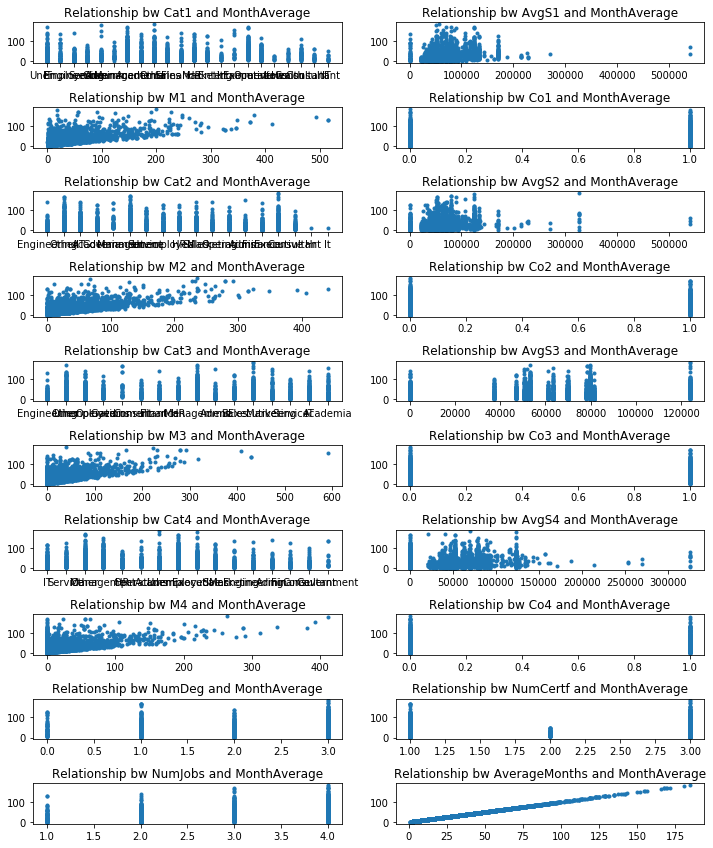

In [19]:
colnames = ['Cat1', 'AvgS1', 'M1', 'Co1', 'Cat2', 'AvgS2', 'M2', 'Co2', 'Cat3', 'AvgS3', 'M3', 'Co3', 'Cat4', 'AvgS4', 'M4', 'Co4', 'NumDeg', 'NumCertf', 'NumJobs', 'AverageMonths']
plotFeatures(colnames,"Relationship bw %s and MonthAverage")

## Create dummy variables for jobs categories

In [20]:
dummy=pd.get_dummies(df, columns=["Cat1", "Cat2", "Cat3", "Cat4"], prefix=["Cat1", "Cat2", "Cat3", "Cat4"])

In [21]:
dummy.head()

,AvgS1,M1,Co1,AvgS2,M2,Co2,AvgS3,M3,Co3,AvgS4,...,Cat4_Government,Cat4_HR,Cat4_IT,Cat4_Management,Cat4_Marketing,Cat4_Operations,Cat4_Other,Cat4_Sales,Cat4_Service,Cat4_Unemployed
0,71779.00000,23,1,81584.97869,13,0,81584.97869,14,0,69783.63690,...,0,0,1,0,0,0,0,0,0,0
1,0.00000,21,1,53085.31717,5,1,53085.31717,33,0,47500.00000,...,0,0,0,0,0,0,0,0,1,0
2,69783.63690,11,1,69783.63690,2,1,0.00000,21,1,53085.31717,...,0,0,0,0,0,0,1,0,0,0
3,81584.97869,7,1,69783.63690,29,1,69434.83383,37,1,79819.50204,...,0,0,0,1,0,0,0,0,0,0
4,37263.83653,190,1,53085.31717,18,0,53085.31717,4,0,53085.31717,...,0,0,0,0,0,0,1,0,0,0


In [22]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513 entries, 0 to 3512
Data columns (total 88 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   AvgS1               3513 non-null   float64 
 1   M1                  3513 non-null   int64   
 2   Co1                 3513 non-null   category
 3   AvgS2               3513 non-null   float64 
 4   M2                  3513 non-null   int64   
 5   Co2                 3513 non-null   category
 6   AvgS3               3513 non-null   float64 
 7   M3                  3513 non-null   int64   
 8   Co3                 3513 non-null   category
 9   AvgS4               3513 non-null   float64 
 10  M4                  3513 non-null   int64   
 11  Co4                 3513 non-null   category
 12  NumDeg              3513 non-null   int64   
 13  NumCertf            3513 non-null   int64   
 14  NumJobs             3513 non-null   int64   
 15  AverageMonths       3513 non-null   fl

## Show Average salaries histogrmas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B613B55B48>]],
      dtype=object)

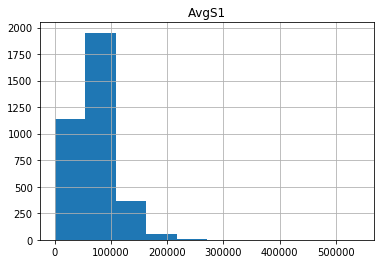

In [23]:
dummy.hist(column='AvgS1')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B613198148>]],
      dtype=object)

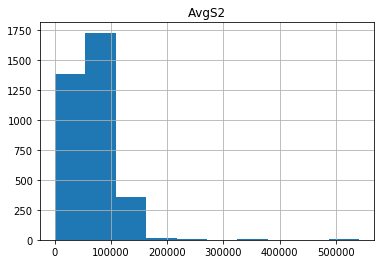

In [24]:
dummy.hist(column='AvgS2')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B61383DB48>]],
      dtype=object)

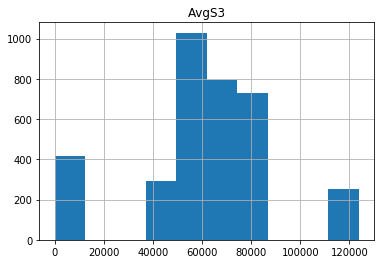

In [25]:
dummy.hist(column='AvgS3')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B6136D4BC8>]],
      dtype=object)

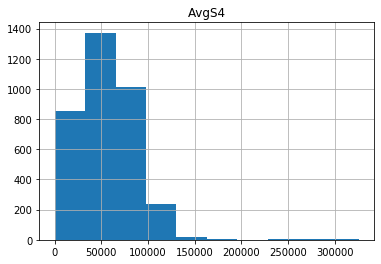

In [26]:
dummy.hist(column='AvgS4')

## Show Months of experience histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B61350E848>]],
      dtype=object)

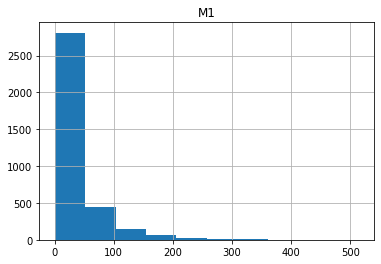

In [27]:
dummy.hist(column='M1')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B6139FBB88>]],
      dtype=object)

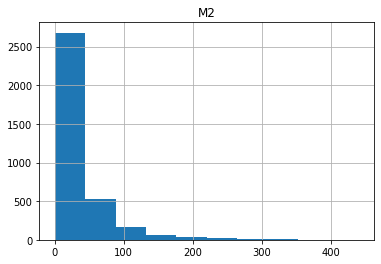

In [28]:
dummy.hist(column='M2')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B613A33288>]],
      dtype=object)

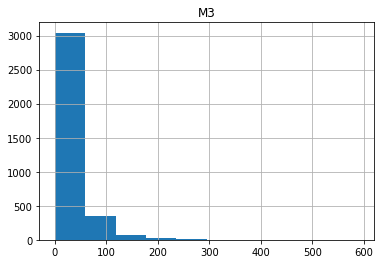

In [29]:
dummy.hist(column='M3')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B61390A288>]],
      dtype=object)

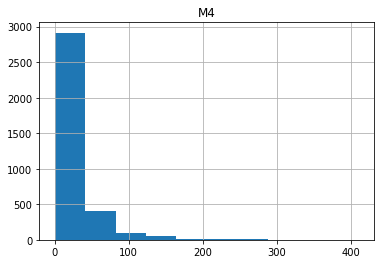

In [30]:
dummy.hist(column='M4')

## Number of jobs histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B6139CA8C8>]],
      dtype=object)

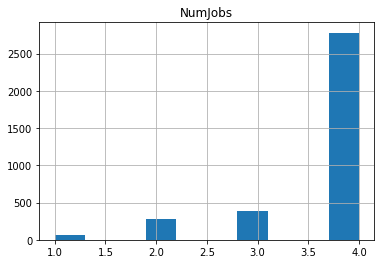

In [31]:
dummy.hist(column='NumJobs')

## Average months of experience 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B613805FC8>]],
      dtype=object)

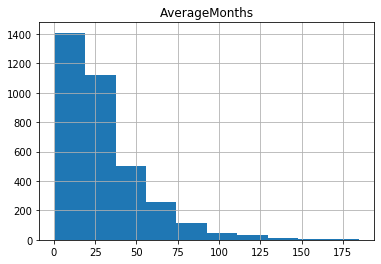

In [32]:
dummy.hist(column='AverageMonths')

# Could be useful to standarize target variable using log function

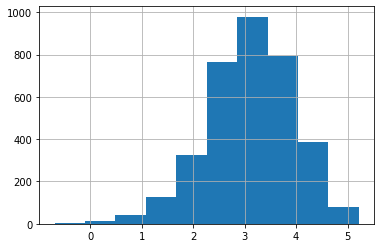

In [33]:
dummy["AverageMonths"].apply(np.log).hist()
plt.show()

In [34]:
dummy['logAvgM']=np.log(dummy['AverageMonths'])

In [35]:
dummy.head()

,AvgS1,M1,Co1,AvgS2,M2,Co2,AvgS3,M3,Co3,AvgS4,...,Cat4_HR,Cat4_IT,Cat4_Management,Cat4_Marketing,Cat4_Operations,Cat4_Other,Cat4_Sales,Cat4_Service,Cat4_Unemployed,logAvgM
0,71779.00000,23,1,81584.97869,13,0,81584.97869,14,0,69783.63690,...,0,1,0,0,0,0,0,0,0,2.602690
1,0.00000,21,1,53085.31717,5,1,53085.31717,33,0,47500.00000,...,0,0,0,0,0,0,0,1,0,2.788093
2,69783.63690,11,1,69783.63690,2,1,0.00000,21,1,53085.31717,...,0,0,0,0,0,1,0,0,0,2.302585
3,81584.97869,7,1,69783.63690,29,1,69434.83383,37,1,79819.50204,...,0,0,1,0,0,0,0,0,0,3.778492
4,37263.83653,190,1,53085.31717,18,0,53085.31717,4,0,53085.31717,...,0,0,0,0,0,1,0,0,0,3.993603


In [36]:
dummy['logAvgM'].describe(include=np.object)

count    3513.000000
mean        3.111935
std         0.836546
min        -0.693147
25%         2.602690
50%         3.157000
75%         3.695110
max         5.219004
Name: logAvgM, dtype: float64

## Standarize average salary, number of jobs, number of degrees, number of certification and average months of experience columns 

In [37]:
scaler = StandardScaler()
cols_to_norm = ['AvgS1','AvgS2','AvgS3','AvgS4', 'M1', 'M2','M3','M4','NumJobs','NumDeg','NumCertf','AverageMonths']
dummy[cols_to_norm] = StandardScaler().fit_transform(dummy[cols_to_norm])

In [38]:
dummy.head()

,AvgS1,M1,Co1,AvgS2,M2,Co2,AvgS3,M3,Co3,AvgS4,...,Cat4_HR,Cat4_IT,Cat4_Management,Cat4_Marketing,Cat4_Operations,Cat4_Other,Cat4_Sales,Cat4_Service,Cat4_Unemployed,logAvgM
0,-0.040119,-0.266575,1,0.356382,-0.496234,0,0.732638,-0.374586,0,0.448848,...,0,1,0,0,0,0,0,0,0,2.602690
1,-2.341835,-0.308786,1,-0.465826,-0.681189,1,-0.237360,0.098301,0,-0.138245,...,0,0,0,0,0,0,0,1,0,2.788093
2,-0.104104,-0.519842,1,0.015916,-0.750547,1,-2.044141,-0.200364,1,0.008908,...,0,0,0,0,0,1,0,0,0,2.302585
3,0.274326,-0.604264,1,0.015916,-0.126324,1,0.319103,0.197856,1,0.713256,...,0,0,1,0,0,0,0,0,0,3.778492
4,-1.146907,3.258060,1,-0.465826,-0.380637,0,-0.237360,-0.623473,0,0.008908,...,0,0,0,0,0,1,0,0,0,3.993603


## Running the base model

In [39]:
from sklearn import model_selection

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
y = dummy.pop("logAvgM")
X = dummy.loc[:, dummy.columns != 'logAvgM']

In [50]:
X = X.drop(columns=['AverageMonths'])

Splitting data into train and test 75% 25%

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [52]:
X_train.shape

(2634, 87)

In [53]:
X_train.head()

,AvgS1,M1,Co1,AvgS2,M2,Co2,AvgS3,M3,Co3,AvgS4,...,Cat4_Government,Cat4_HR,Cat4_IT,Cat4_Management,Cat4_Marketing,Cat4_Operations,Cat4_Other,Cat4_Sales,Cat4_Service,Cat4_Unemployed
1496,-0.526090,-0.076624,1,-0.363736,-0.519353,1,-0.302109,-0.250142,1,0.008908,...,0,0,0,0,0,0,1,0,0,0
1440,-0.700568,-0.393208,0,-0.751271,-0.750547,0,-0.281289,-0.673251,1,-0.251768,...,0,0,0,0,0,0,0,0,0,0
1668,-0.386040,-0.667581,1,0.305448,-0.634950,1,-0.439612,-0.673251,1,-0.147653,...,0,0,0,0,0,0,0,1,0,0
1320,0.217713,-0.435419,1,-0.465826,-0.357518,1,-0.775850,-0.474141,1,0.008908,...,0,0,0,0,0,0,1,0,0,0
2139,-0.104104,0.113326,1,0.015916,-0.519353,0,0.672550,0.222745,1,0.713256,...,0,0,0,1,0,0,0,0,0,0


In [54]:
y_train.shape

(2634,)

In [55]:
# define the model
model = GradientBoostingRegressor()

In [56]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

In [57]:
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -0.066 (0.004)


In [58]:
scoring = 'r2'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.987 (0.003)


In [73]:
from sklearn.model_selection import learning_curve

In [74]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = model,
X = X_train,
y = y_train, cv = 5,
scoring = 'neg_mean_squared_error')

In [75]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 210     0.001562
684     0.003638
1158    0.003829
1632    0.004317
2107    0.004553
dtype: float64

 --------------------

Mean validation scores

 210     0.036064
684     0.014340
1158    0.011092
1632    0.009379
2107    0.008851
dtype: float64


In [76]:
import matplotlib.pyplot as plt

(0, 0.035)

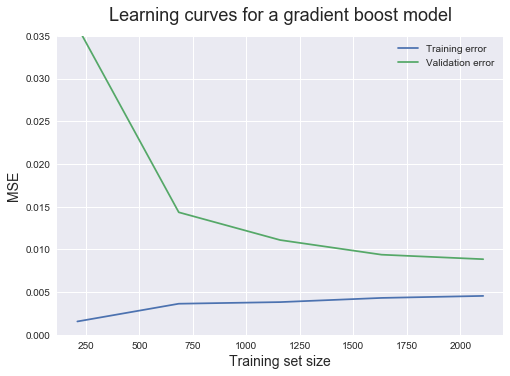

In [78]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a gradient boost model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.035)

In [59]:
gbr_fit = model.fit(X_train, y_train)
gbr_predict = model.predict(X_test)
gbr_results = gbr_predict

In [60]:
gbr_results

array([3.02543477, 2.6182968 , 2.4449353 , 3.35993097, 2.79884817,
       4.34222891, 3.97408155, 3.25158714, 2.6920172 , 2.77234191,
       3.63635685, 2.80188936, 2.82869691, 1.82466191, 3.11400919,
       4.5246723 , 3.01747562, 3.98731689, 3.74146342, 3.17984875,
       1.70451892, 2.512102  , 2.34293297, 3.15111672, 2.03928599,
       3.64024434, 2.34464671, 3.61765454, 0.25497156, 3.05294516,
       3.21776669, 3.84982001, 3.25978675, 1.98014903, 2.9633539 ,
       2.9503694 , 3.958611  , 2.29069941, 4.54675314, 2.89498005,
       3.77069338, 4.76004721, 3.04159897, 2.83745659, 2.55003974,
       3.89560383, 3.3302566 , 3.57261978, 3.57843431, 3.1150124 ,
       3.39998167, 3.18283149, 3.04834809, 3.39553154, 4.06802247,
       2.61862565, 1.29460314, 2.81187714, 2.25216682, 0.71403233,
       3.895086  , 3.68338504, 3.36691148, 3.13956756, 2.9104513 ,
       2.72137852, 2.56983317, 3.10520549, 3.3172165 , 3.64524235,
       3.95886837, 3.59586399, 2.08209901, 1.74464673, 2.39498

In [61]:
gbr_df = pd.DataFrame(gbr_results, columns = ["logresults"])

In [62]:
gbr_df.head()

,logresults
0,3.025435
1,2.618297
2,2.444935
3,3.359931
4,2.798848


In [63]:
gbr_df['Avg'] = np.exp(gbr_df['logresults'])


In [64]:
gbr_df.head()

,logresults,Avg
0,3.025435,20.602960
1,2.618297,13.712349
2,2.444935,11.529804
3,3.359931,28.787204
4,2.798848,16.425716


In [65]:
from interpret import show
from interpret.data import Marginal


Expore Data

In [66]:
marginal = Marginal().explain_data(X_train, y_train, name = 'Train Data')
show(marginal)

<!-- http://127.0.0.1:7031/1881406064392/ -->

Train the Explainable Boosting Machine (EBM)

In [67]:
from interpret.glassbox import ExplainableBoostingRegressor, LinearRegression, RegressionTree, LogisticRegression

lr = LinearRegression(random_state=42)
lr.fit(X_train, y_train)

rt = RegressionTree(random_state=42)
rt.fit(X_train, y_train)

ebm = ExplainableBoostingRegressor(random_state=42)
ebm.fit(X_train, y_train)  
# For Classifier, use ebm = ExplainableBoostingClassifier(

ExplainableBoostingRegressor(binning='quantile', early_stopping_rounds=50,
                             early_stopping_tolerance=0,
                             feature_names=['AvgS1', 'M1', 'Co1', 'AvgS2', 'M2',
                                            'Co2', 'AvgS3', 'M3', 'Co3',
                                            'AvgS4', 'M4', 'Co4', 'NumDeg',
                                            'NumCertf', 'NumJobs',
                                            'Cat1_Academia', 'Cat1_Admin',
                                            'Cat1_Consultant',
                                            'Cat1_Consultant ',
                                            'Cat1_Engineering',
                                            'Cat1_Entertainment',
                                            'Cat1_Executive', 'Cat1_F...
                                            'categorical', 'categorical',
                                            'categorical', 'categorical',
                  

Performance of Model

In [68]:
from interpret import show
from interpret.perf import RegressionPerf

ebm_perf = RegressionPerf(ebm.predict).explain_perf(X_test, y_test, name='EBM')
lr_perf = RegressionPerf(lr.predict).explain_perf(X_test, y_test, name='Linear Regression')
rt_perf = RegressionPerf(rt.predict).explain_perf(X_test, y_test, name='Regression Tree')
show(ebm_perf)
show(lr_perf)
show(rt_perf)

<!-- http://127.0.0.1:7031/1881558364808/ -->

<!-- http://127.0.0.1:7031/1881558308424/ -->

<!-- http://127.0.0.1:7031/1881558308232/ -->

Global Interpretability

In [69]:
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

<!-- http://127.0.0.1:7031/1881446233800/ -->

Local Interpretability

In [70]:
ebm_local = ebm.explain_local(X_test[:15], y_test[:15], name='EBM')
show(ebm_local)

<!-- http://127.0.0.1:7031/1881561615752/ -->

In [71]:
lr_global = lr.explain_global(name='Linear Regression')
rt_global = rt.explain_global(name='Regression Tree')


In [72]:
show([marginal, lr_global, lr_perf, rt_global, rt_perf, ebm_perf, ebm_global, ebm_local])

<!-- http://127.0.0.1:7031/1881561615880/ -->
 Open in new window